# 장애인콜택시 대기시간 예측
## 단계2. 탐색적 데이터 분석

## 0.미션

* 1.개별 변수 분석하기
    * 앞서 생성된 각 변수들 특히 추가로 생성한 변수들에 대해서 단변량 분석을 수행합니다. 
    * 시각화 : Histogram, Boxplot, Barplot
    * 통계량 : 기초 통계량.
    * [옵션] 날짜 요소 관점을 추가해서 EDA 를 수행하시오.
* 2.Features와 Target의 관계 분석하기
    * Target은 숫자입니다.
    * 숫자형 feature들과 Target 과의 관계
        * 한꺼번에 상관관계를 확인하는 방법을 이용하여 분석합시다.
    * 범주형 feature들과 Target
        * sns.barplot, t-검정, 분산분석 등을 이용하여 분석합니다.
    * Target과 관련이 높은 feature와 그렇지 않은 feature를 정리해 봅시다.

## 1.환경설정

### (1) 라이브러리 불러오기

* **세부 요구사항**
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
import joblib

# 필요하다고 판단되는 라이브러리를 추가하세요.




### (2) 데이터 로딩
* 주어진 데이터셋
    * [1.전처리 단계]에서 저장한 파일 : data1pkl
* 다음의 두가지 방법 중 하나를 선택하시오.
    * 1) 로컬 수행(Ananconda)
    * 2) 구글콜랩

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [ ]:
path = ''

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/KT_aivle/미니프로젝트6차/장애인콜택시대기시간/'

#### 3) 데이터 읽어오기

In [4]:
file1 = 'data1.pkl'

In [59]:
import joblib
data = joblib.load(path+file1)
data

,Date,N_of_Cars,N_of_apply,N_of_rides,Waiting_T,Price,Distance,year,month,week,...,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),day_of_week,Roll_Waiting_T,holiday,target,Roll_N_of_rides
0,2015-01-01,213,1023,924,23.2,2427,10764,2015,1,1,...,-9.8,0.0,52.0,33.0,9.79,3,23.200000,1.0,17.2,924.000000
1,2015-01-02,420,3158,2839,17.2,2216,8611,2015,1,1,...,-8.9,0.0,63.0,28.0,9.07,4,20.200000,0.0,26.2,1881.500000
2,2015-01-03,209,1648,1514,26.2,2377,10198,2015,1,1,...,-9.2,0.0,73.0,37.0,8.66,5,22.200000,0.0,24.5,1759.000000
3,2015-01-04,196,1646,1526,24.5,2431,10955,2015,1,1,...,0.2,0.0,89.0,58.0,5.32,6,22.775000,0.0,26.2,1700.750000
4,2015-01-05,421,4250,3730,26.2,2214,8663,2015,1,2,...,-0.9,0.0,95.0,52.0,6.48,0,23.460000,0.0,23.6,2106.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,2022-12-27,669,5635,4654,44.4,2198,8178,2022,12,52,...,-7.3,0.0,86.0,51.0,10.25,1,42.771429,0.0,44.8,3807.000000
2921,2022-12-28,607,5654,4648,44.8,2161,7882,2022,12,52,...,-5.4,0.1,92.0,40.0,10.86,2,43.514286,0.0,52.5,3783.142857
2922,2022-12-29,581,5250,4247,52.5,2229,8433,2022,12,52,...,-7.8,0.0,71.0,34.0,10.88,3,42.957143,0.0,38.3,3716.142857
2923,2022-12-30,600,5293,4200,38.3,2183,8155,2022,12,52,...,-4.0,0.0,87.0,38.0,10.84,4,41.042857,0.0,33.7,3693.142857


In [61]:
data[data['Date']=='2017-10-03']

,Date,N_of_Cars,N_of_apply,N_of_rides,Waiting_T,Price,Distance,year,month,week,...,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),day_of_week,Roll_Waiting_T,holiday,target,Roll_N_of_rides
1006,2017-10-03,260,1676,1352,24.2,2567,11747,2017,10,40,...,13.4,0.0,64.0,45.0,7.19,1,53.571429,1.0,24.2,2694.714286
1007,2017-10-03,260,1676,1352,24.2,2567,11747,2017,10,40,...,13.4,0.0,64.0,45.0,7.19,1,53.571429,1.0,24.6,2292.571429
1008,2017-10-03,260,1676,1352,24.2,2567,11747,2017,10,40,...,13.4,0.0,64.0,45.0,7.19,1,53.571429,1.0,24.2,1920.285714
1009,2017-10-03,260,1676,1352,24.2,2567,11747,2017,10,40,...,13.4,0.0,64.0,45.0,7.19,1,53.571429,1.0,24.6,1539.428571


In [63]:
data = data.drop_duplicates(subset=['Date'], keep='first')

## 2.EDA : 1단계 - 개별 정보 분석하기

* **세부요구사항**
    * 의미 있는 변수들을 7개 이상 선정하고 단변량분석을 수행합니다. 
    * [옵션] 각 변수에 대한 탐색시, 요일별, 월별, 연도별로 나눠서도 확인해보세요.
    * 단변량 분석을 위한 코드를 함수로 작성하고 수행하세요.

### (1) 단변량 분석 함수 작성
* **세부요구사항**
    * 코드가 반복되므로, 시각화와 기초통계량을 한꺼번에 처리하는 함수를 생성합시다.
    * 포함되어야 할 내용 : 
        * 기초통계량
            * 숫자 : .describe()
            * 범주 : 범주별 빈도수/비율
        * 시각화


In [6]:
# 숫자형 변수 분석
data.describe()

,N_of_Cars,N_of_apply,N_of_rides,Waiting_T,Price,Distance,year,month,week,day,...,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),day_of_week,Roll_Waiting_T,holiday,target,Roll_N_of_rides
count,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,...,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2924.000000,2925.000000
mean,418.539145,3923.300513,3281.913846,40.289162,2304.541880,9256.057436,2018.498120,6.526496,26.658120,15.716581,...,9.412137,3.352171,79.079316,41.120615,13.489956,2.998974,40.299830,0.041709,40.295144,3279.812891
std,133.783042,1510.684754,1250.055883,14.100746,107.534498,1021.798274,2.290858,3.449320,15.065204,8.806517,...,10.783881,12.589799,14.031862,16.391500,6.939566,1.999743,12.045459,0.199958,14.099460,453.559231
min,132.000000,527.000000,462.000000,17.200000,2131.000000,7672.000000,2015.000000,1.000000,1.000000,1.000000,...,-18.500000,0.000000,29.000000,7.000000,0.000000,0.000000,18.800000,0.000000,17.200000,924.000000
25%,277.000000,2159.000000,1777.000000,29.600000,2228.000000,8521.000000,2017.000000,4.000000,14.000000,8.000000,...,0.500000,0.000000,70.000000,29.000000,8.220000,1.000000,31.285714,0.000000,29.600000,3112.285714
50%,454.000000,4720.000000,3931.000000,38.200000,2257.000000,8822.000000,2018.000000,7.000000,27.000000,16.000000,...,10.000000,0.000000,81.000000,39.000000,12.660000,3.000000,39.042857,0.000000,38.200000,3371.571429
75%,522.000000,5110.000000,4241.000000,48.600000,2401.000000,10155.000000,2020.000000,10.000000,40.000000,23.000000,...,18.900000,0.300000,90.000000,51.000000,18.580000,5.000000,47.071429,0.000000,48.600000,3559.714286
max,1413.000000,6182.000000,5189.000000,96.100000,2733.000000,14136.000000,2022.000000,12.000000,53.000000,31.000000,...,30.400000,178.900000,100.000000,98.000000,30.790000,6.000000,83.928571,1.000000,96.100000,4169.000000


In [11]:
# 범주형 변수 분석
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2924
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             2925 non-null   datetime64[ns]
 1   N_of_Cars        2925 non-null   int64         
 2   N_of_apply       2925 non-null   int64         
 3   N_of_rides       2925 non-null   int64         
 4   Waiting_T        2925 non-null   float64       
 5   Price            2925 non-null   int64         
 6   Distance         2925 non-null   int64         
 7   year             2925 non-null   int64         
 8   month            2925 non-null   int64         
 9   week             2925 non-null   int64         
 10  day              2925 non-null   int64         
 11  temp_max         2925 non-null   float64       
 12  temp_min         2925 non-null   float64       
 13  rain(mm)         2925 non-null   float64       
 14  humidity_max(%)  2925 non-null   float64

### (2) 숫자형 변수
* 이제 숫자형 변수들에 대해서 단변량 분석을 수행합니다.

In [13]:
data.columns

Index(['Date', 'N_of_Cars', 'N_of_apply', 'N_of_rides', 'Waiting_T', 'Price',
       'Distance', 'year', 'month', 'week', 'day', 'temp_max', 'temp_min',
       'rain(mm)', 'humidity_max(%)', 'humidity_min(%)', 'sunshine(MJ/m2)',
       'day_of_week', 'Roll_Waiting_T', 'holiday', 'target',
       'Roll_N_of_rides'],
      dtype='object')

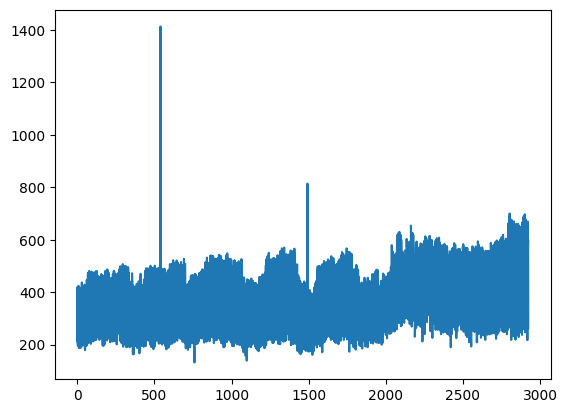

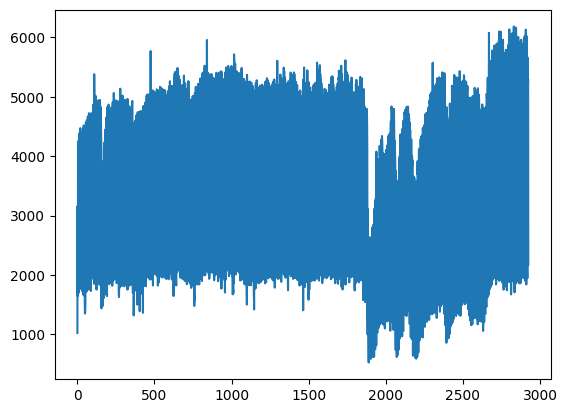

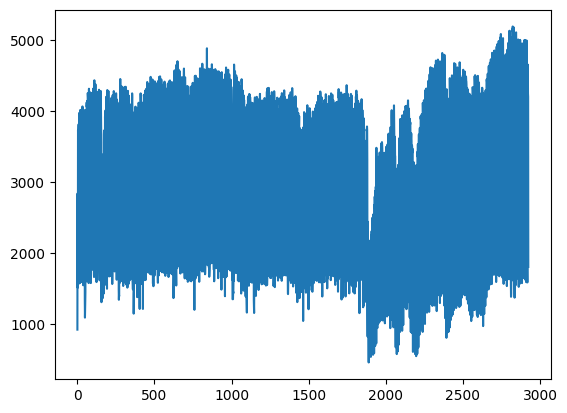

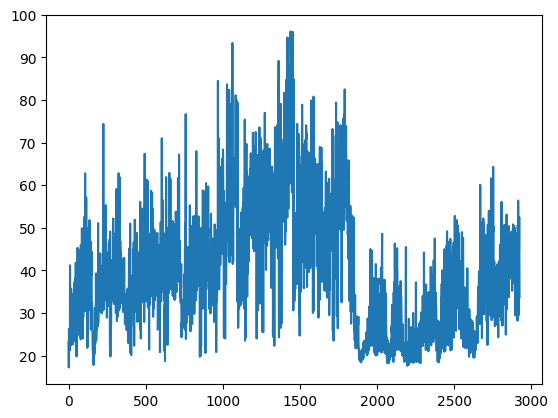

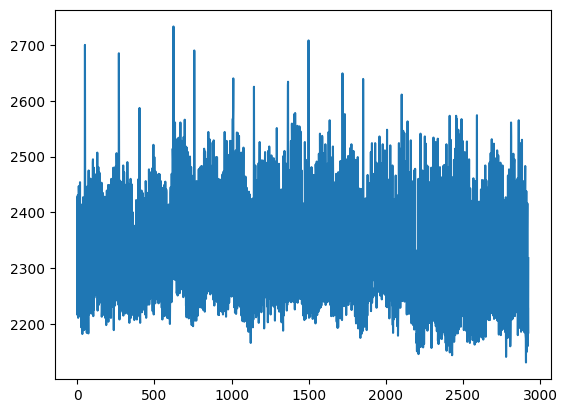

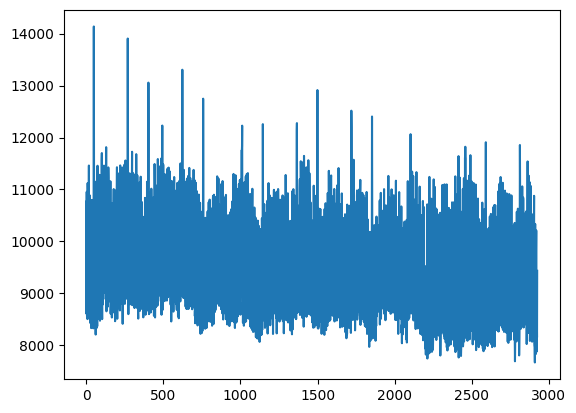

In [14]:
cols = ['N_of_Cars', 'N_of_apply', 'N_of_rides', 'Waiting_T', 'Price','Distance']

for col in cols:
  plt.plot(data[col])
  plt.show()

### (3) 범주형 변수
* 범주형 변수들에 대해서 단변량 분석을 수행합니다.

## 3.EDA 2단계 - feature와 target 비교 분석하기

* **세부요구사항**
    * 숫자 feature --> target
        * 전체 상관계수 구하고 시각화(heatmap)해서 파악해봅시다.
        * 상위 n개의 feature와 target의 상점도를 확인해봅시다.
    * 범주 feature --> target
        * 시각화 : 평균 비교 barplot
        * 수치화 : t-test, anova
    * 이번 단계에서는 함수 생성은 선택사항 입니다.

### (1) 숫자 feature --> Target
* 전체 상관계수 시각화(heatmap)
* 상위 n개 산점도 그리기

#### 1) 전체 상관계수 시각화

<ipython-input-21-e81c52cb2cbe>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, fmt='.2f')


<Axes: >

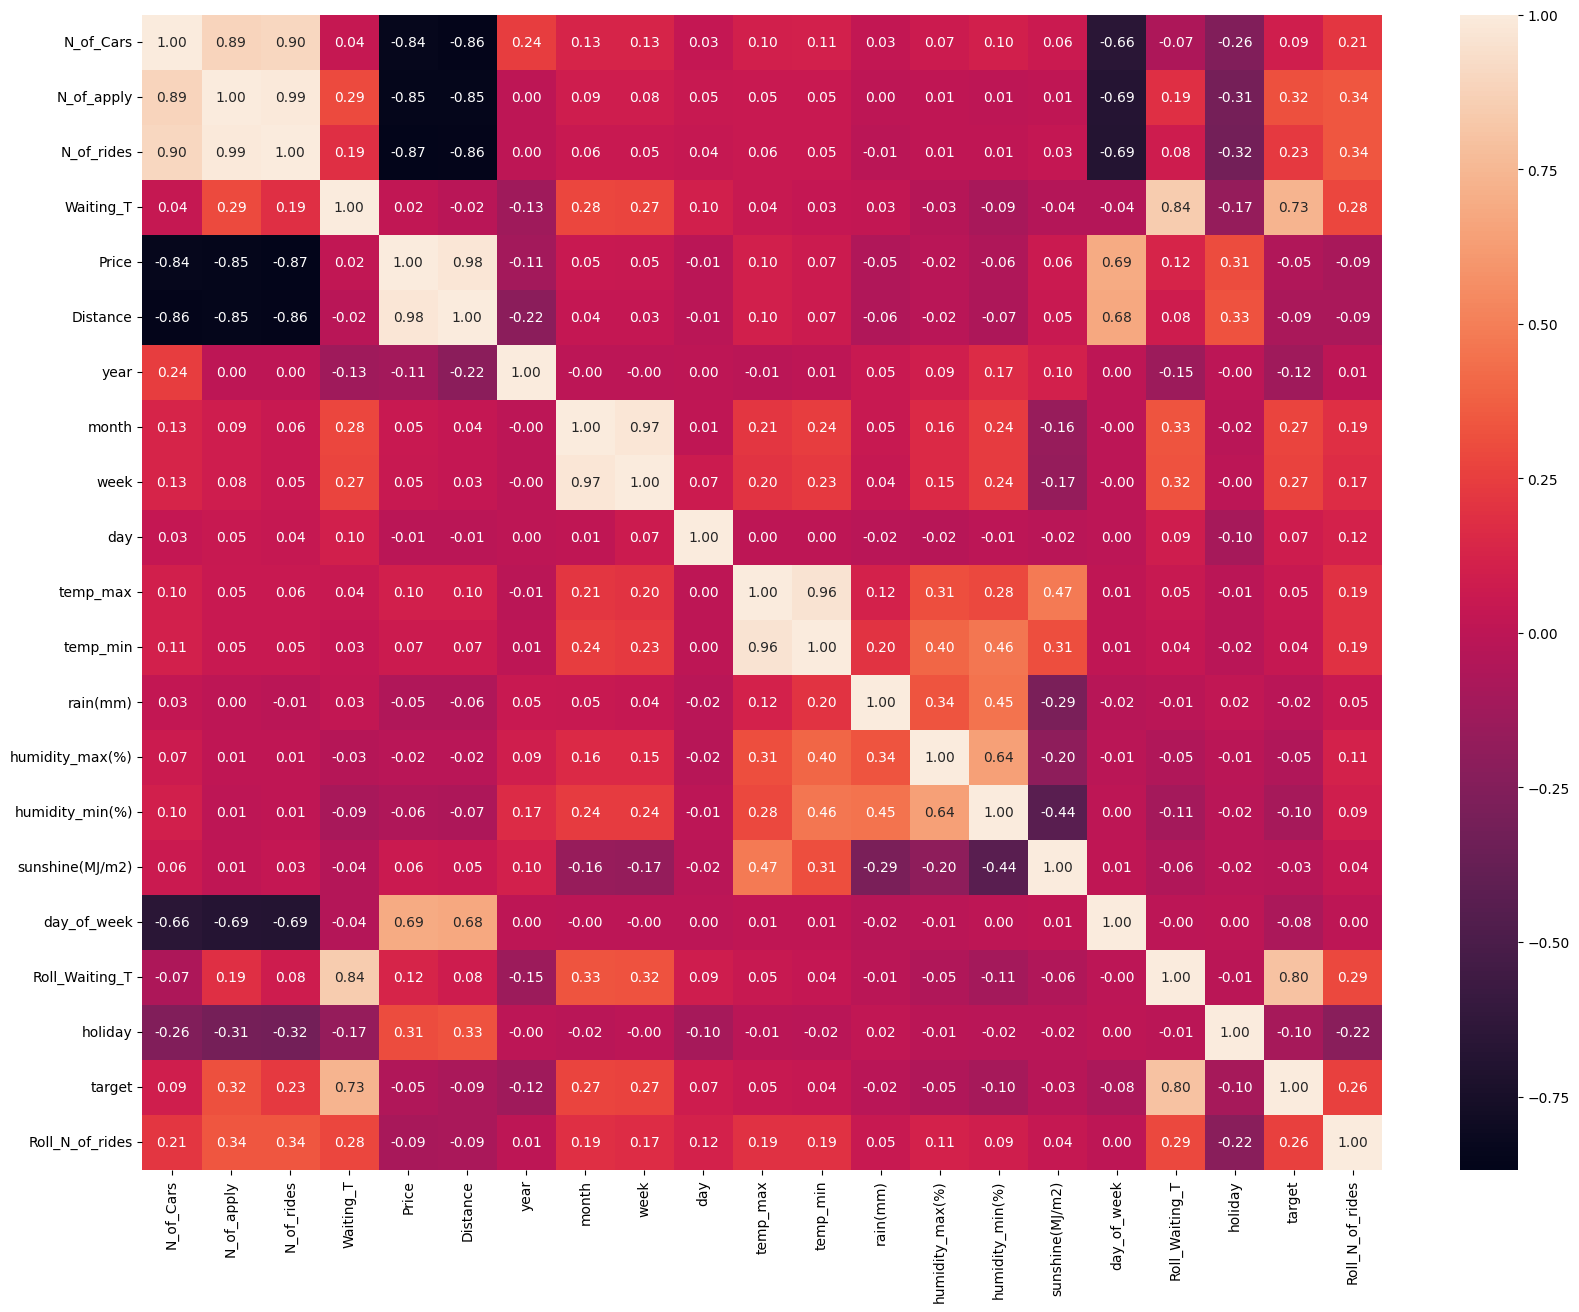

In [21]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), annot=True, fmt='.2f')

In [40]:
corr_matrix = data.corr()
corr_values = corr_matrix.abs().unstack().sort_values(ascending=False)
corr_values = corr_values[corr_values!=1]

corr_values[::2][:10]

<ipython-input-40-a324942e64e0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


N_of_rides  N_of_apply    0.988777
Distance    Price         0.977706
week        month         0.973541
temp_max    temp_min      0.961640
N_of_Cars   N_of_rides    0.904791
            N_of_apply    0.886054
Price       N_of_rides    0.868066
Distance    N_of_rides    0.858801
            N_of_Cars     0.857407
Price       N_of_apply    0.850467
dtype: float64

#### 2) 산점도

<Axes: xlabel='N_of_rides', ylabel='N_of_apply'>

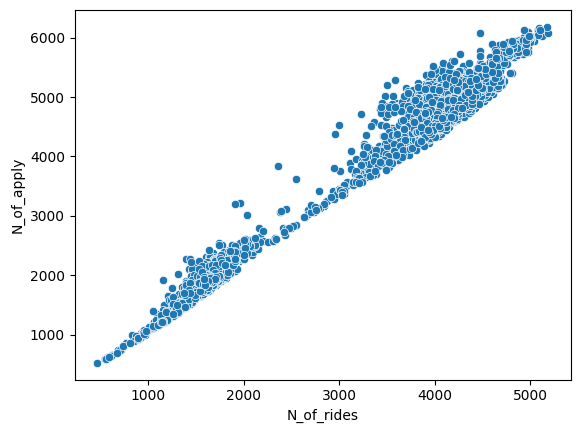

In [44]:
sns.scatterplot(x=data['N_of_rides'], y=data['N_of_apply'])

### (2) 범주 feature --> Target

* 범주형 변수들과 target 간의 관계를 살펴봅시다.
    * 시각화 : 평균비교 barplot
    * 수치화 : t-검정, anova

<Axes: xlabel='month', ylabel='target'>

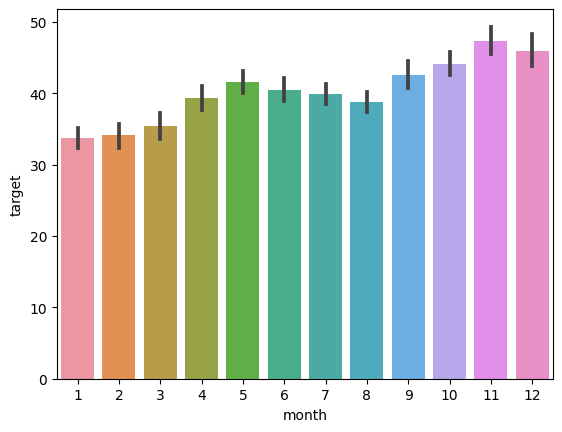

In [50]:
sns.barplot(x=data['month'], y=data['target'])

In [52]:
from scipy.stats import shapiro, kruskal, levene, f_oneway # welch_anova : equal_var=False
y15 = data['year']==
print(spst.f_oneway(data['month'], data['target']))

F_onewayResult(statistic=nan, pvalue=nan)


## 4.변수 정리

* Target과 관련성이 높은 feature와 그렇지 않은 feature를 정리합니다.
* 여기서의 판단은 다소 주관적입니다. 조금 정확하지 않아도 괜찮습니다.
* 다음 단계 모델링에서 관련이 적은 변수는 포함시키거나, 제외를 고려할때 활용합니다.

* 강한 관계의 변수

In [53]:
corr_matrix = data.corr()
corr_values = corr_matrix.abs().unstack().sort_values(ascending=False)
corr_values = corr_values[corr_values!=1]

corr_values[::2][:10]

<ipython-input-53-a324942e64e0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


N_of_rides  N_of_apply    0.988777
Distance    Price         0.977706
week        month         0.973541
temp_max    temp_min      0.961640
N_of_Cars   N_of_rides    0.904791
            N_of_apply    0.886054
Price       N_of_rides    0.868066
Distance    N_of_rides    0.858801
            N_of_Cars     0.857407
Price       N_of_apply    0.850467
dtype: float64

* 중간(약한) 관계의 변수

* (거의) 관계가 없는 변수

In [58]:
corr_matrix = data.corr()
corr_values = corr_matrix.abs().unstack().sort_values(ascending=False)
corr_values = corr_values[corr_values!=1]

corr_values[::2][-5:]

<ipython-input-58-26ffb1d01aaa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


month        day_of_week    0.001211
day          year           0.000745
month        year           0.000481
year         day_of_week    0.000410
day_of_week  day            0.000119
dtype: float64

## 5.데이터 저장

* **세부 요구사항**
    * 혹시 데이터에 변경이 발생할 수 있으니, 저장해 놓읍시다.
    * joblib.dump를 이용하시오.
    * 저장할 파일 이름 : data2.pkl